In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

red_wine = pd.read_csv('winequality-red.csv', delimiter= ';')
white_wine = pd.read_csv('winequality-white.csv', delimiter= ';')

In [25]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 0
if value <= 5 else 1)

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 0
if value <= 5 else 1)

In [6]:
rw = pd.DataFrame(red_wine)
ww = pd.DataFrame(white_wine)

In [7]:
ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [8]:
all_wine = pd.concat([white_wine, red_wine], ignore_index=True)
all_wine.shape[0]

6497

In [9]:
#finding empty values in the columns
ww.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

In [10]:
#finding the duplicates
ww.duplicated().sum()

937

In [11]:
#removing all duplicates
ww.drop_duplicates(inplace=True)

In [12]:
X = ww.drop(columns=['quality_label', 'quality'])
y = ww['quality_label']

display(X.shape)
display(y.shape)

(3961, 11)

(3961,)

In [13]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
# Scaler
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [17]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())


In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['LogisticRegression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

c:\Users\renev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


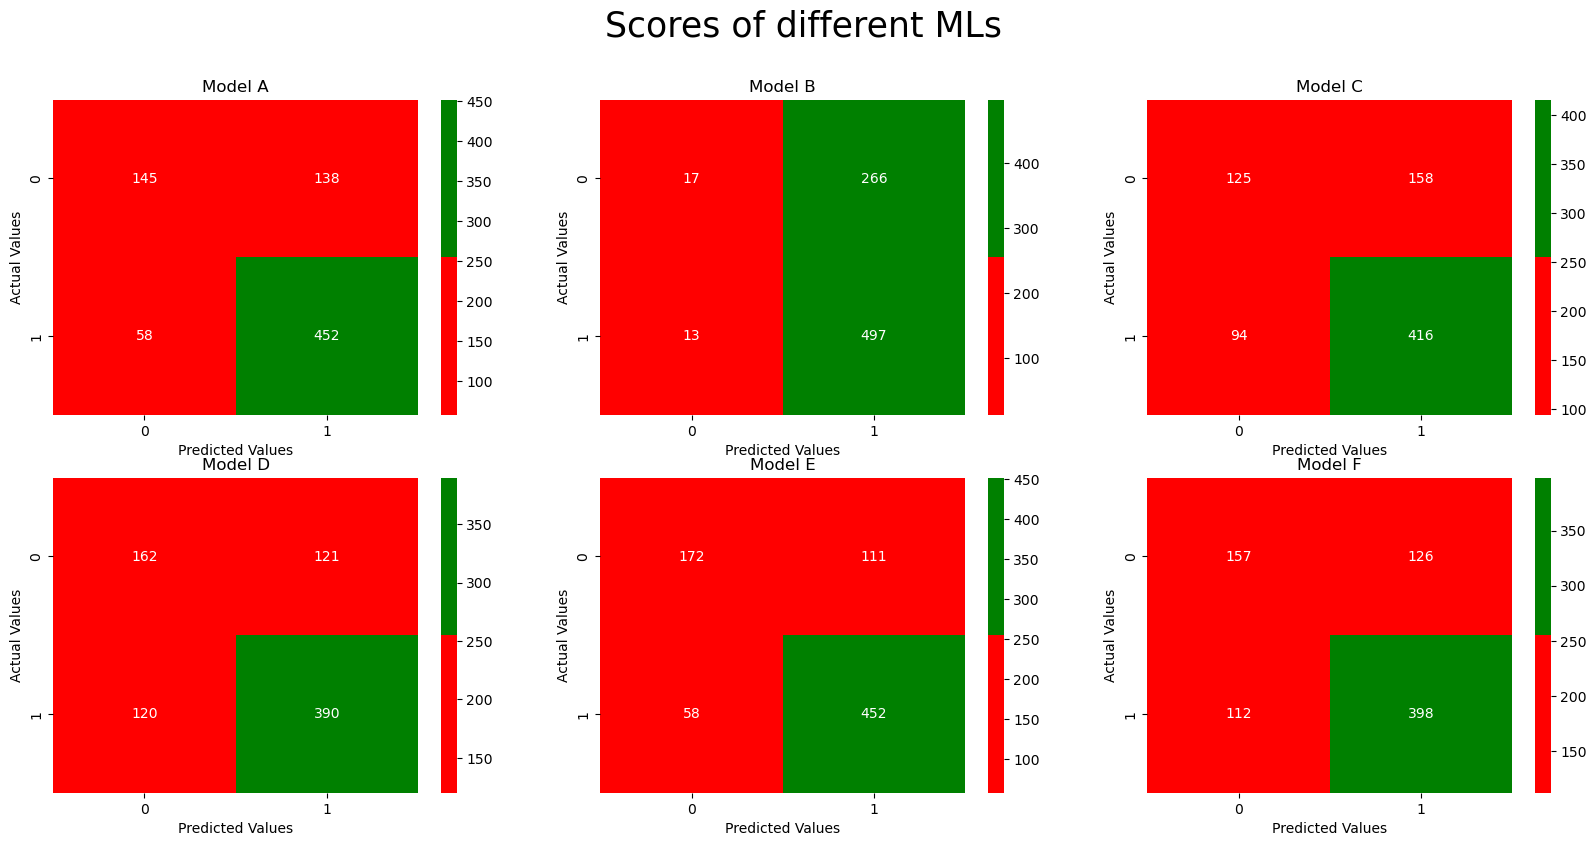

In [28]:
## plot confusion matrix
from matplotlib import colors

# Define the colors for each category
low_color = 'red'
med_color =  'green'
colors_list = [low_color, med_color]

fig = plt.figure(figsize=(20,9))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = colors_list, fmt= '.0f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
plt.suptitle('Scores of different MLs', fontsize= 25)

plt.show()

In [24]:
### accuracy and AUC
results_df = pd.DataFrame({'Model': model_list,  'Accuracy': acc_list, 'AUC': auc_list})
display(results_df)

,Model,Accuracy,AUC
0,Model A,0.75,0.70
1,Model B,0.84,0.52
2,Model C,0.69,0.63
3,Model D,0.92,0.67
4,Model E,0.78,0.75
5,Model F,0.81,0.67


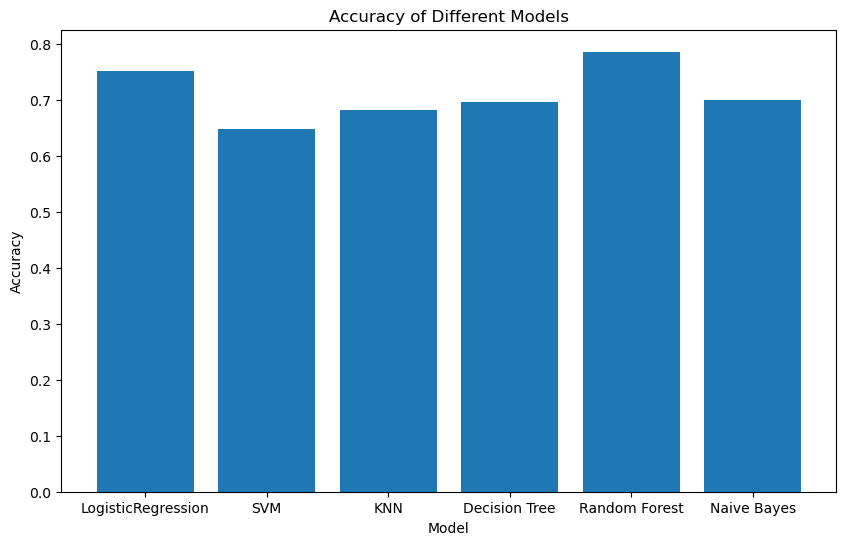

In [21]:
# Create a bar chart showing the accuracy of each model
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(results_df['Model'], results_df['Accuracy'])


# Set the title and axis labels
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()

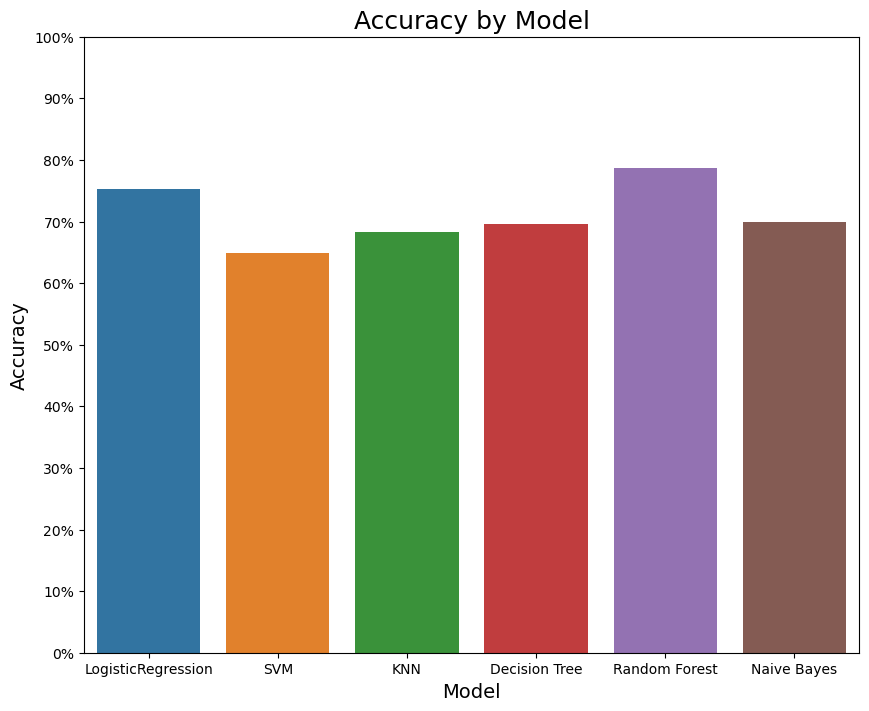

In [22]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=ax)
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax.set_title('Accuracy by Model', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
plt.show()